# Exploratory Data Analysis: Obesity Level Prediction

## Project Overview

This notebook provides a comprehensive exploratory data analysis (EDA) of the obesity levels dataset. The goal is to understand the relationships between eating habits, physical conditions, and obesity levels to build an effective predictive model.

**Dataset Source**: Estimation of Obesity Levels Based On Eating Habits and Physical Condition [Dataset]. (2019). UCI Machine Learning Repository.

## Objectives

1. Understand the structure and quality of the data
2. Analyze the distribution of obesity levels (target variable)
3. Explore relationships between features and target variable
4. Identify key predictors of obesity
5. Detect potential data quality issues
6. Guide feature engineering and model selection decisions

## 1. Import Required Libraries

We'll use the following libraries for our analysis:
- **pandas**: Data manipulation and analysis
- **numpy**: Numerical computing
- **matplotlib & seaborn**: Data visualization
- **scipy**: Statistical analysis
- **ucimlrepo**: Dataset retrieval from UCI ML Repository

In [4]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Dataset retrieval
from ucimlrepo import fetch_ucirepo

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

We'll fetch the obesity dataset from the UCI Machine Learning Repository. This dataset contains information about individuals from Colombia, Peru, and Mexico, including their eating habits, physical conditions, and obesity levels.

In [23]:
# Ensure project src/ is on the Python path for imports
import os, sys
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, repo_root)
print(f"Added to sys.path: {repo_root}")

from src.components.data_ingestion import DataIngestion

# Instantiate and run data ingestion
data_ingestion = DataIngestion()
train_path, test_path = data_ingestion.initiate_data_ingestion()

# Load the complete dataset for EDA
df = pd.read_csv(data_ingestion.ingestion_config.raw_data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}, Samples: {df.shape[0]}")


Added to sys.path: /Users/dimdim/PycharmProjects/ml_zoomcamp_final_project
Dataset loaded successfully!
Shape: (2111, 17)
Features: 16, Samples: 2111


## 3. Dataset Overview

Let's examine the structure of our dataset, including data types, column names, and a sample of the data.

In [6]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.00,1.62,53.00,no,yes,2.00,3.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Automobile,Normal_Weight
6,Female,23.00,1.50,55.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,1.00,0.00,Sometimes,Motorbike,Normal_Weight
7,Male,22.00,1.64,53.00,no,no,2.00,3.00,Sometimes,no,2.00,no,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.00,1.78,64.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,1.00,1.00,Frequently,Public_Transportation,Normal_Weight
9,Male,22.00,1.72,68.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.00,no,Public_Transportation,Normal_Weight


In [7]:
# Dataset information
print("Dataset Information:")
print("=" * 80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF          

In [8]:
# Column descriptions
print("\nColumn Names and Descriptions:")
print("=" * 80)

column_descriptions = {
    'Gender': 'Gender (Male/Female)',
    'Age': 'Age in years',
    'Height': 'Height in meters',
    'Weight': 'Weight in kilograms',
    'family_history_with_overweight': 'Family history with overweight (yes/no)',
    'FAVC': 'Frequent consumption of high caloric food (yes/no)',
    'FCVC': 'Frequency of consumption of vegetables (1-3)',
    'NCP': 'Number of main meals (1-4)',
    'CAEC': 'Consumption of food between meals (no/Sometimes/Frequently/Always)',
    'SMOKE': 'Smoking status (yes/no)',
    'CH2O': 'Daily water consumption (1-3 liters)',
    'SCC': 'Calories consumption monitoring (yes/no)',
    'FAF': 'Physical activity frequency (0-3 days per week)',
    'TUE': 'Time using technology devices (0-2 hours per day)',
    'CALC': 'Consumption of alcohol (no/Sometimes/Frequently/Always)',
    'MTRANS': 'Transportation used (Automobile/Motorbike/Bike/Public_Transportation/Walking)',
    'NObeyesdad': 'Obesity level (target variable)'
}

for col, desc in column_descriptions.items():
    if col in df.columns:
        print(f"{col:40s} : {desc}")


Column Names and Descriptions:
Gender                                   : Gender (Male/Female)
Age                                      : Age in years
Height                                   : Height in meters
Weight                                   : Weight in kilograms
family_history_with_overweight           : Family history with overweight (yes/no)
FAVC                                     : Frequent consumption of high caloric food (yes/no)
FCVC                                     : Frequency of consumption of vegetables (1-3)
NCP                                      : Number of main meals (1-4)
CAEC                                     : Consumption of food between meals (no/Sometimes/Frequently/Always)
SMOKE                                    : Smoking status (yes/no)
CH2O                                     : Daily water consumption (1-3 liters)
SCC                                      : Calories consumption monitoring (yes/no)
FAF                                      : Physic

In [9]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove target from features lists
if 'NObeyesdad' in numerical_features:
    numerical_features.remove('NObeyesdad')
if 'NObeyesdad' in categorical_features:
    categorical_features.remove('NObeyesdad')

print(f"\nNumerical Features ({len(numerical_features)}):")
print(numerical_features)
print(f"\nCategorical Features ({len(categorical_features)}):")
print(categorical_features)
print(f"\nTarget Variable: NObeyesdad")


Numerical Features (8):
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Categorical Features (8):
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

Target Variable: NObeyesdad


## 4. Data Quality Assessment

### 4.1 Missing Values Analysis

Checking for missing values is crucial to understand data completeness and decide on appropriate handling strategies.

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print("=" * 80)
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\n✓ Great! No missing values found in the dataset.")

Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

✓ Great! No missing values found in the dataset.


### 4.2 Duplicate Records

In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates / len(df)) * 100:.2f}%")

if duplicates > 0:
    print("\nSample of duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))

Number of duplicate rows: 24
Percentage of duplicates: 1.14%

Sample of duplicate rows:
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
97   Female 21.00    1.52   42.00                             no   no  3.00   
98   Female 21.00    1.52   42.00                             no   no  3.00   
105  Female 25.00    1.57   55.00                             no  yes  2.00   
106  Female 25.00    1.57   55.00                             no  yes  2.00   
145    Male 21.00    1.62   70.00                             no  yes  2.00   
174    Male 21.00    1.62   70.00                             no  yes  2.00   
179    Male 21.00    1.62   70.00                             no  yes  2.00   
184    Male 21.00    1.62   70.00                             no  yes  2.00   
208  Female 22.00    1.69   65.00                            yes  yes  2.00   
209  Female 22.00    1.69   65.00                            yes  yes  2.00   

     NCP        CAEC SMOKE  CH2O SCC  FAF 

## 5. Target Variable Analysis

### 5.1 Obesity Level Distribution

Understanding the distribution of our target variable is crucial for:
- Identifying class imbalance
- Understanding the prevalence of different obesity levels
- Guiding model selection and evaluation strategies

In [12]:
# Obesity level distribution
target_counts = df['NObeyesdad'].value_counts().sort_index()
target_percentage = (target_counts / len(df)) * 100

print("Obesity Level Distribution:")
print("=" * 80)
for level, count in target_counts.items():
    pct = target_percentage[level]
    print(f"{level:30s}: {count:4d} ({pct:5.2f}%)")

print(f"\nTotal samples: {len(df)}")
print(f"Number of classes: {df['NObeyesdad'].nunique()}")

Obesity Level Distribution:
Insufficient_Weight           :  272 (12.88%)
Normal_Weight                 :  287 (13.60%)
Obesity_Type_I                :  351 (16.63%)
Obesity_Type_II               :  297 (14.07%)
Obesity_Type_III              :  324 (15.35%)
Overweight_Level_I            :  290 (13.74%)
Overweight_Level_II           :  290 (13.74%)

Total samples: 2111
Number of classes: 7


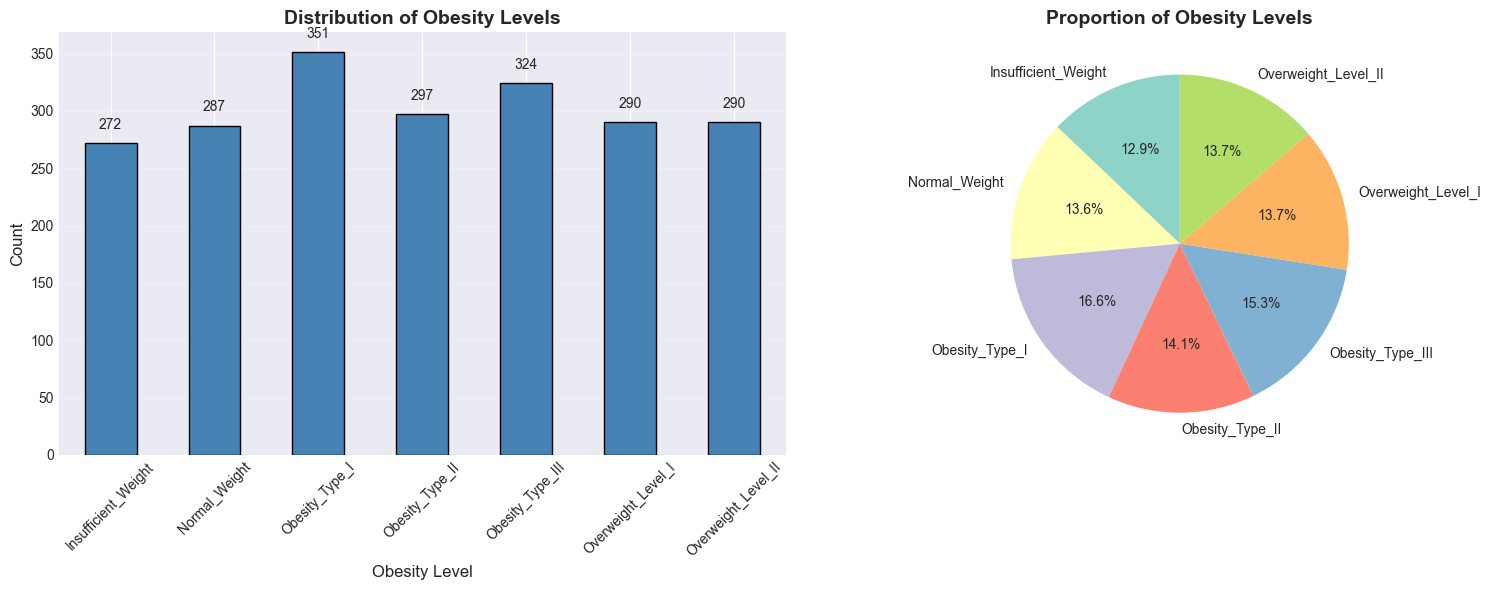

In [13]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Distribution of Obesity Levels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Obesity Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (idx, val) in enumerate(target_counts.items()):
    axes[0].text(i, val + 10, str(val), ha='center', va='bottom', fontsize=10)

# Pie chart
colors = plt.cm.Set3(range(len(target_counts)))
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Proportion of Obesity Levels', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Numerical Features Analysis

### 6.1 Statistical Summary

Let's examine the statistical properties of numerical features including central tendency, spread, and potential outliers.

In [14]:
# Descriptive statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
print("=" * 80)
df[numerical_features].describe().T

Descriptive Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
Age,2111.00,24.31,6.35,14.00,19.95,22.78,26.00,61.00
Height,2111.00,1.70,0.09,1.45,1.63,1.70,1.77,1.98
Weight,2111.00,86.59,26.19,39.00,65.47,83.00,107.43,173.00
FCVC,2111.00,2.42,0.53,1.00,2.00,2.39,3.00,3.00
NCP,2111.00,2.69,0.78,1.00,2.66,3.00,3.00,4.00
CH2O,2111.00,2.01,0.61,1.00,1.58,2.00,2.48,3.00
FAF,2111.00,1.01,0.85,0.00,0.12,1.00,1.67,3.00
TUE,2111.00,0.66,0.61,0.00,0.00,0.63,1.00,2.00


### 6.2 Distribution of Numerical Features

Visualizing distributions helps us understand:
- Data skewness and normality
- Presence of outliers
- Range and spread of values

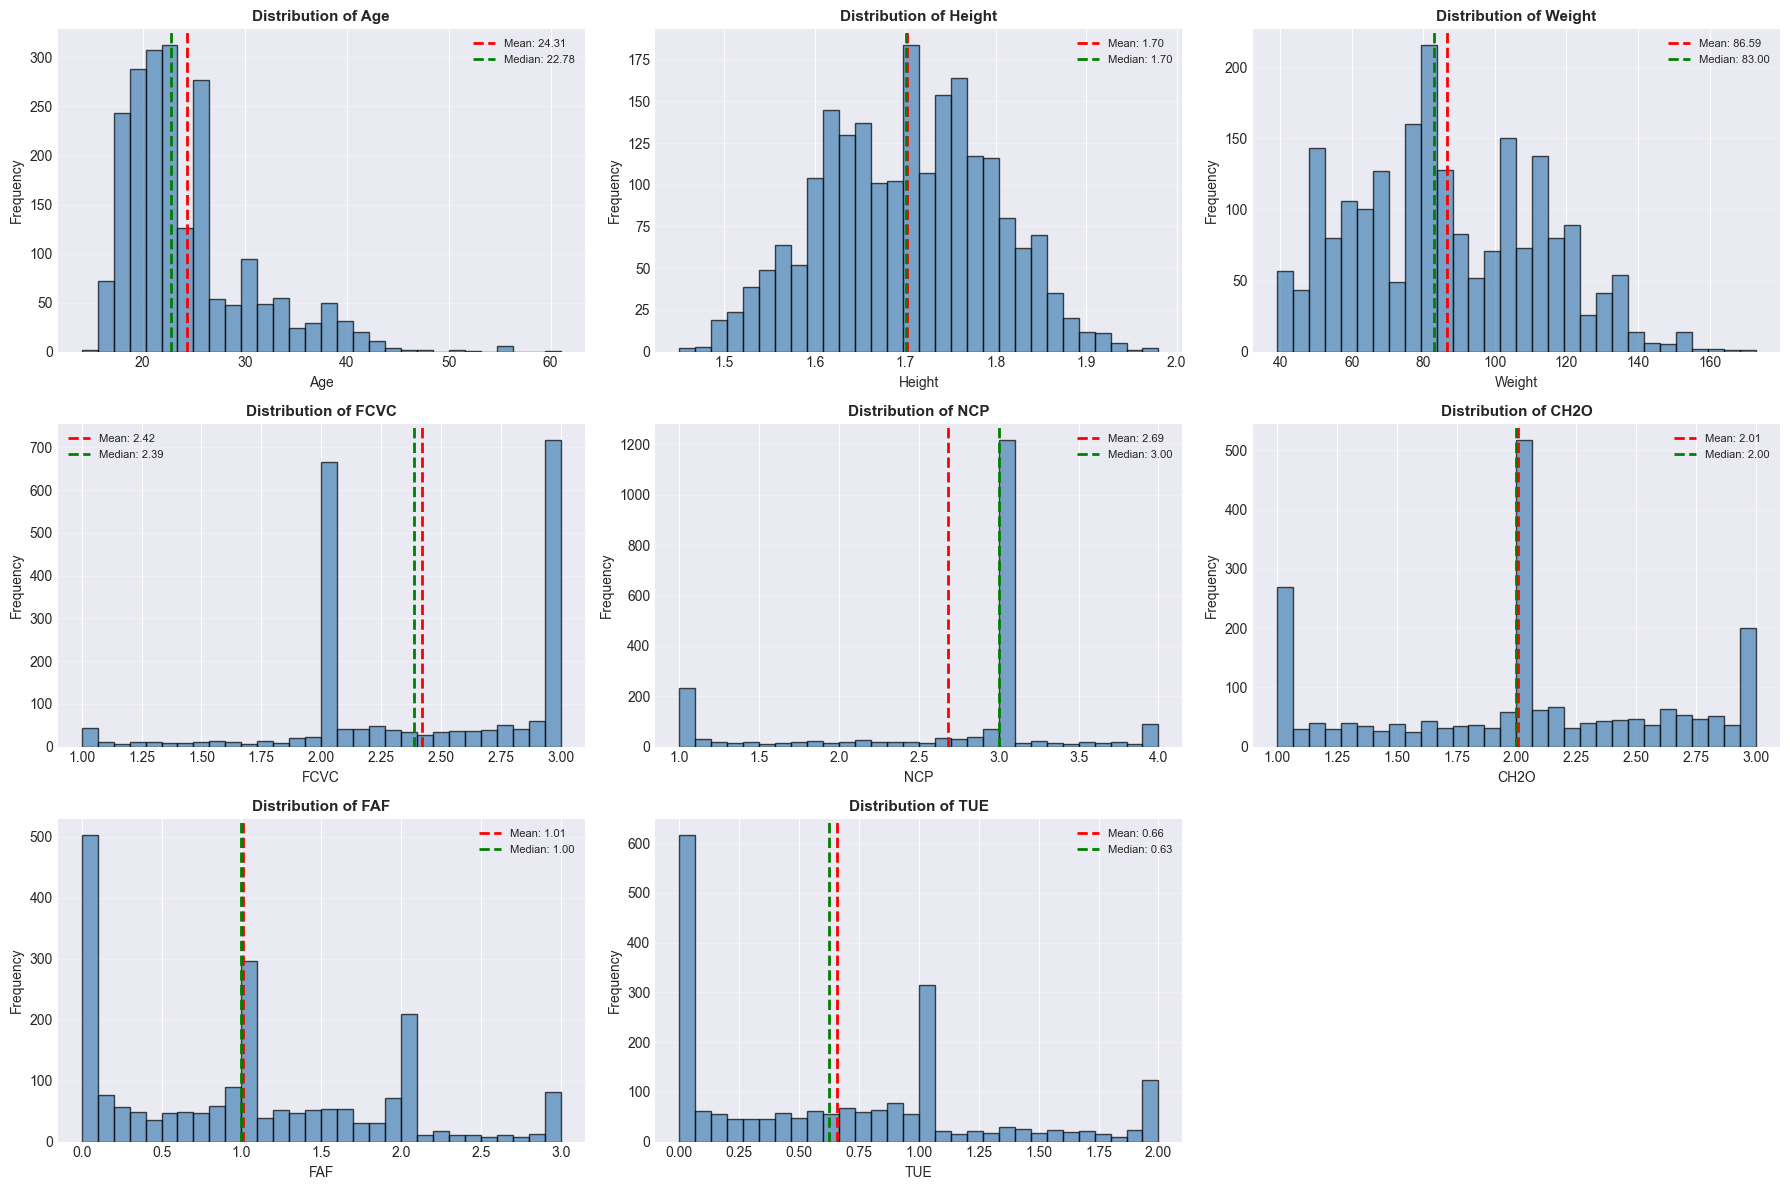

In [15]:
# Distribution plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    if idx < len(axes):
        # Histogram with KDE
        axes[idx].hist(df[col], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add mean and median lines
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend(fontsize=8)

# Hide unused subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### 6.3 Box Plots for Outlier Detection

Box plots help identify outliers and understand the quartile distribution of each numerical feature.

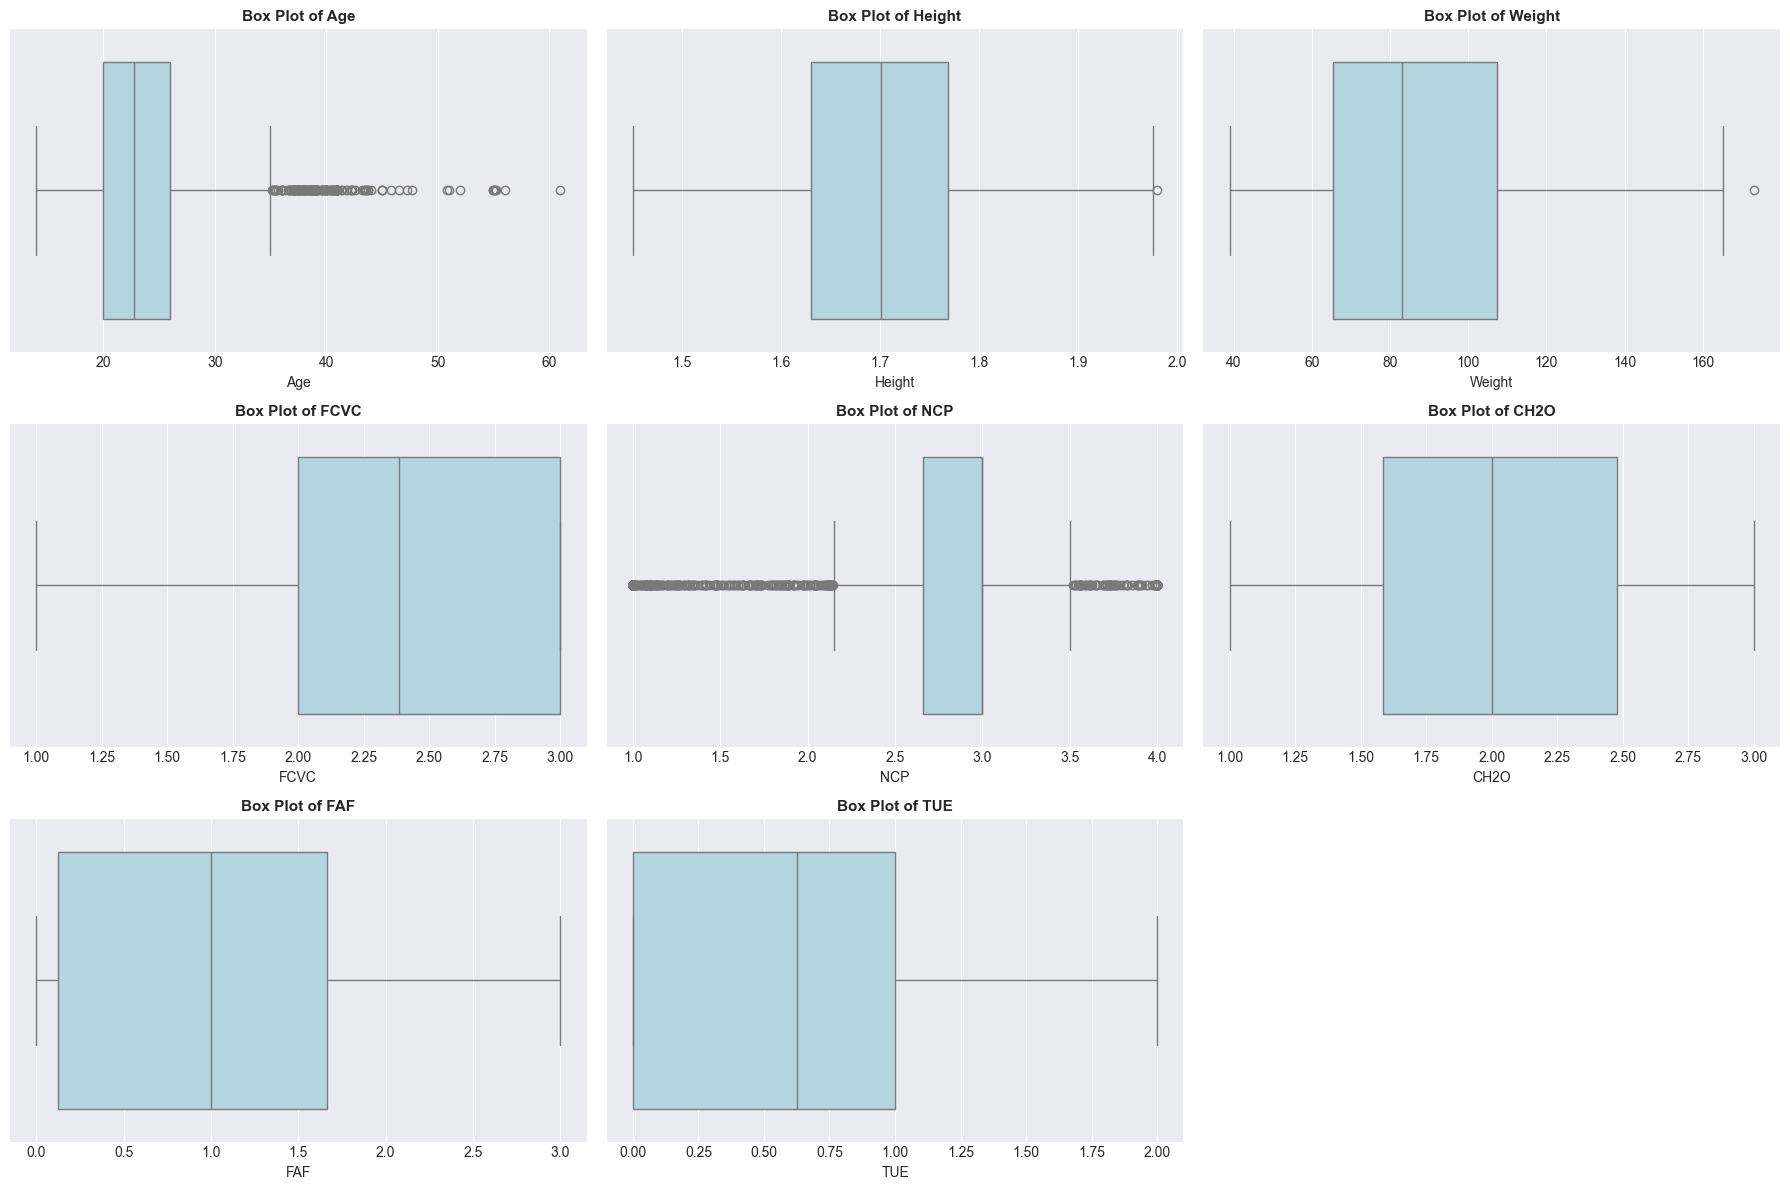

In [16]:
# Box plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    if idx < len(axes):
        sns.boxplot(x=df[col], ax=axes[idx], color='lightblue')
        axes[idx].set_title(f'Box Plot of {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)

# Hide unused subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### 6.4 Derived Feature: BMI

Body Mass Index (BMI) is a widely used indicator calculated as:

$\text{BMI} = \frac{\text{Weight (kg)}}{\text{Height (m)}^2}$

We'll compute BMI, inspect its distribution, and analyze its relationship with obesity levels.

BMI added. Summary:
count   2111.00
mean      29.70
std        8.01
min       13.00
25%       24.33
50%       28.72
75%       36.02
max       50.81
Name: BMI, dtype: float64


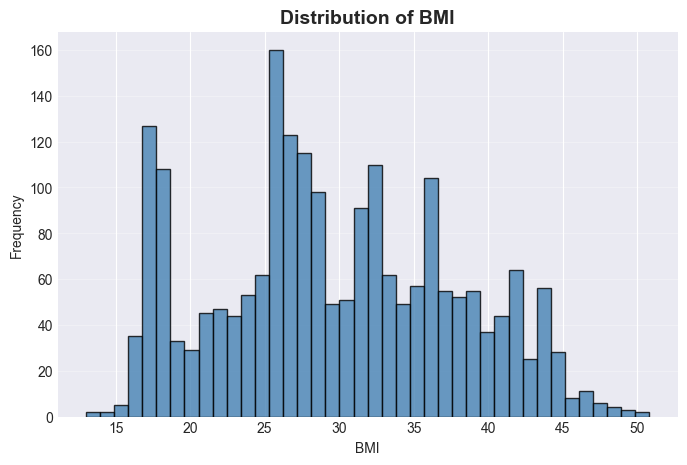

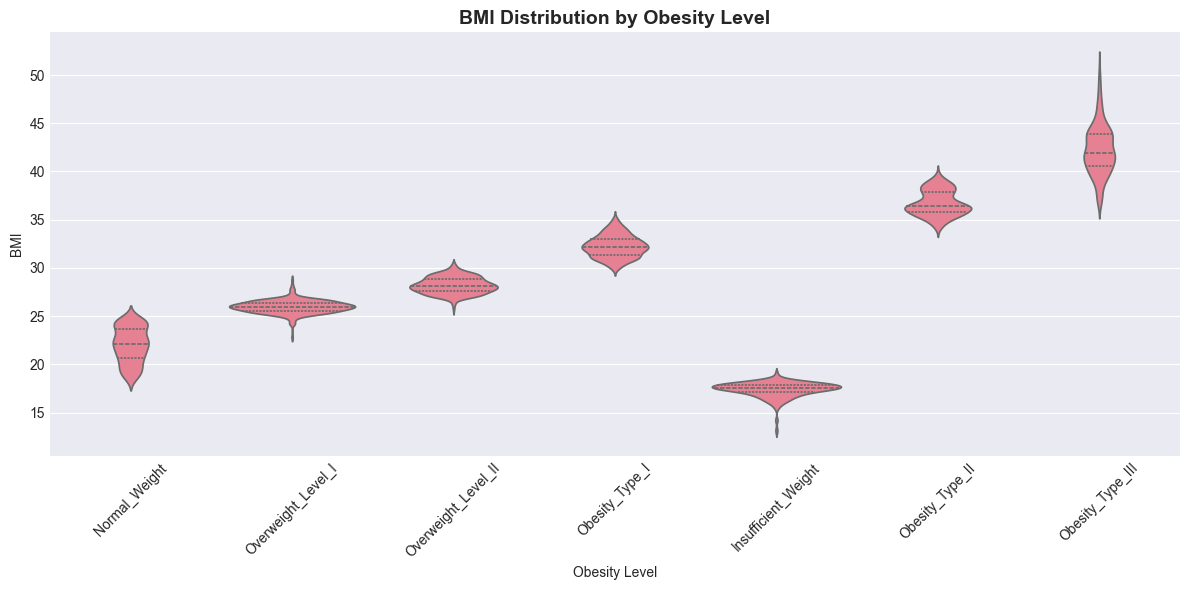

In [18]:
# Compute BMI and analyze
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Update feature lists to include BMI
if 'BMI' not in numerical_features:
    numerical_features.append('BMI')

print("BMI added. Summary:")
print(df['BMI'].describe())

# Distribution of BMI
plt.figure(figsize=(8, 5))
plt.hist(df['BMI'], bins=40, color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of BMI', fontsize=14, fontweight='bold')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

# BMI by obesity class
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='NObeyesdad', y='BMI', inner='quartile')
plt.title('BMI Distribution by Obesity Level', fontsize=14, fontweight='bold')
plt.xlabel('Obesity Level')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Categorical Features Analysis

We will analyze the distribution of categorical features and their relationships with the target variable.

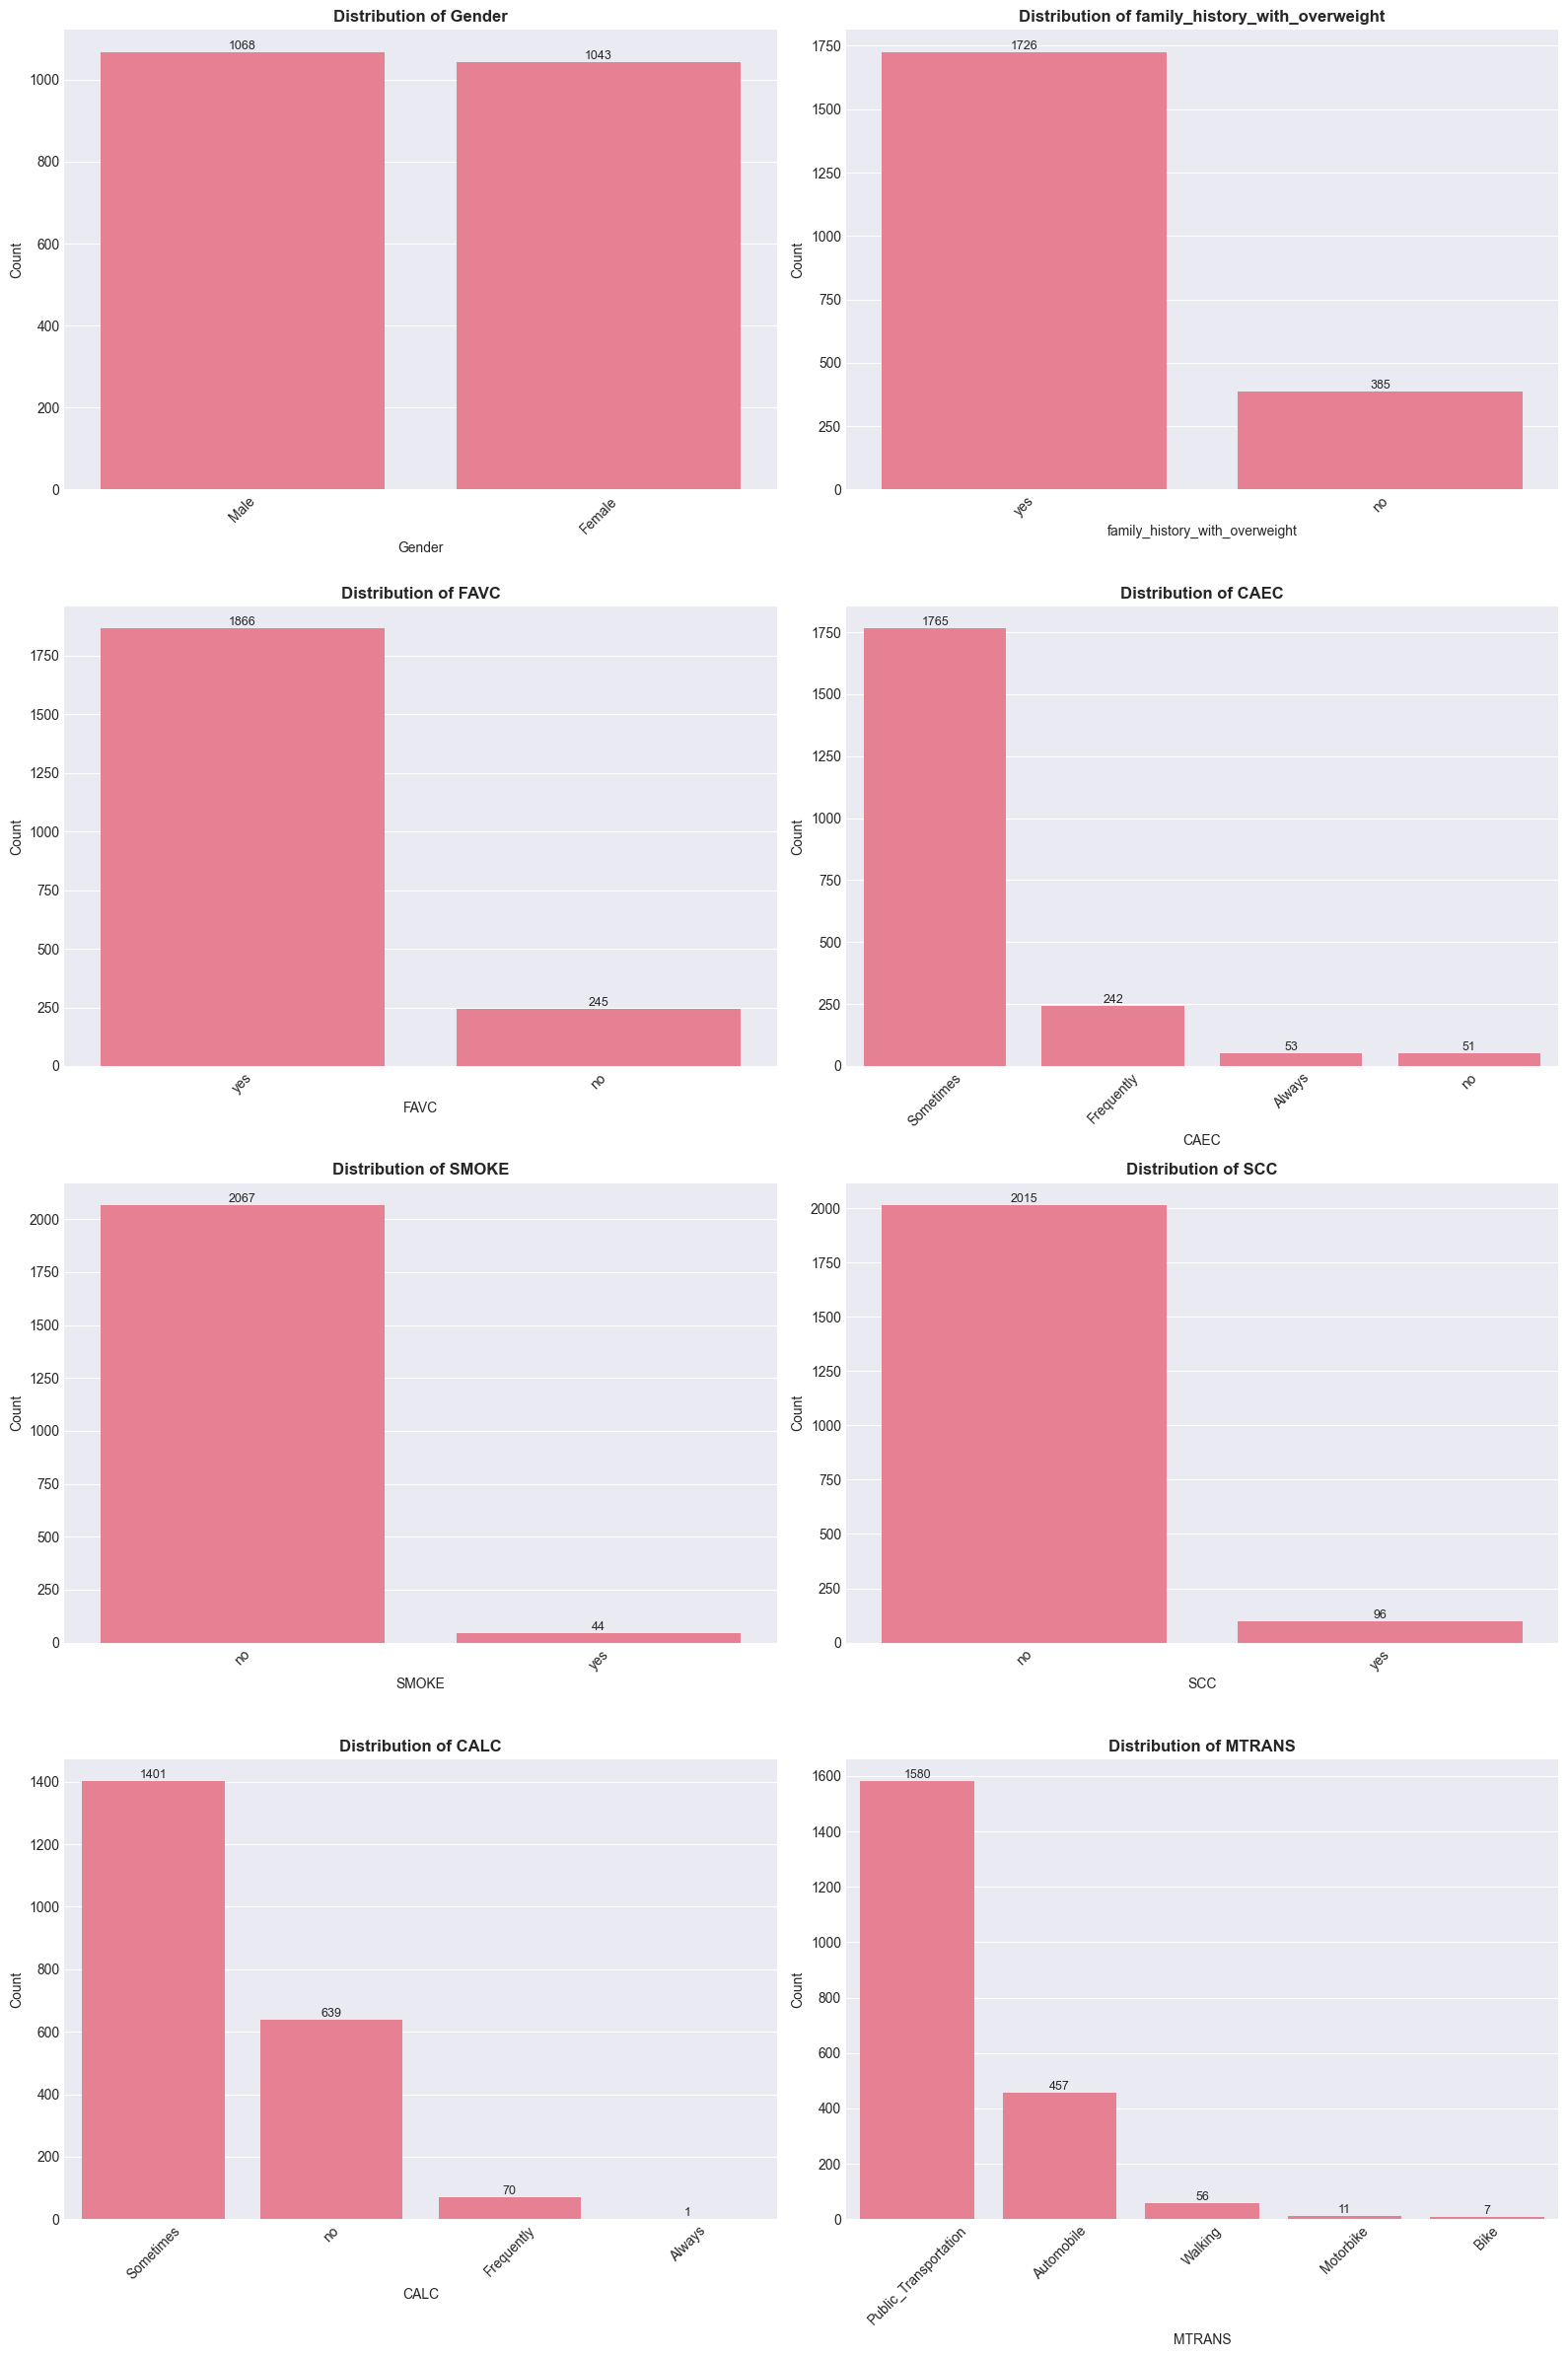

In [17]:
# Bar plots for categorical features
def plot_categorical_distributions(df, categorical_features, hue=None):
    n = len(categorical_features)
    cols = 2
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(16, 6 * rows))
    axes = axes.ravel()

    for idx, col in enumerate(categorical_features):
        ax = axes[idx]
        if hue is None:
            sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(data=df, x=col, hue=hue, ax=ax, order=df[col].value_counts().index)
        ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=45)
        
        # Show counts on top of bars
        for container in ax.containers:
            ax.bar_label(container, fontsize=9)

    # Hide unused axes
    for idx in range(n, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df, categorical_features)

### 7.1 Categorical vs Target

We will analyze how categorical features relate to the target variable `NObeyesdad`.

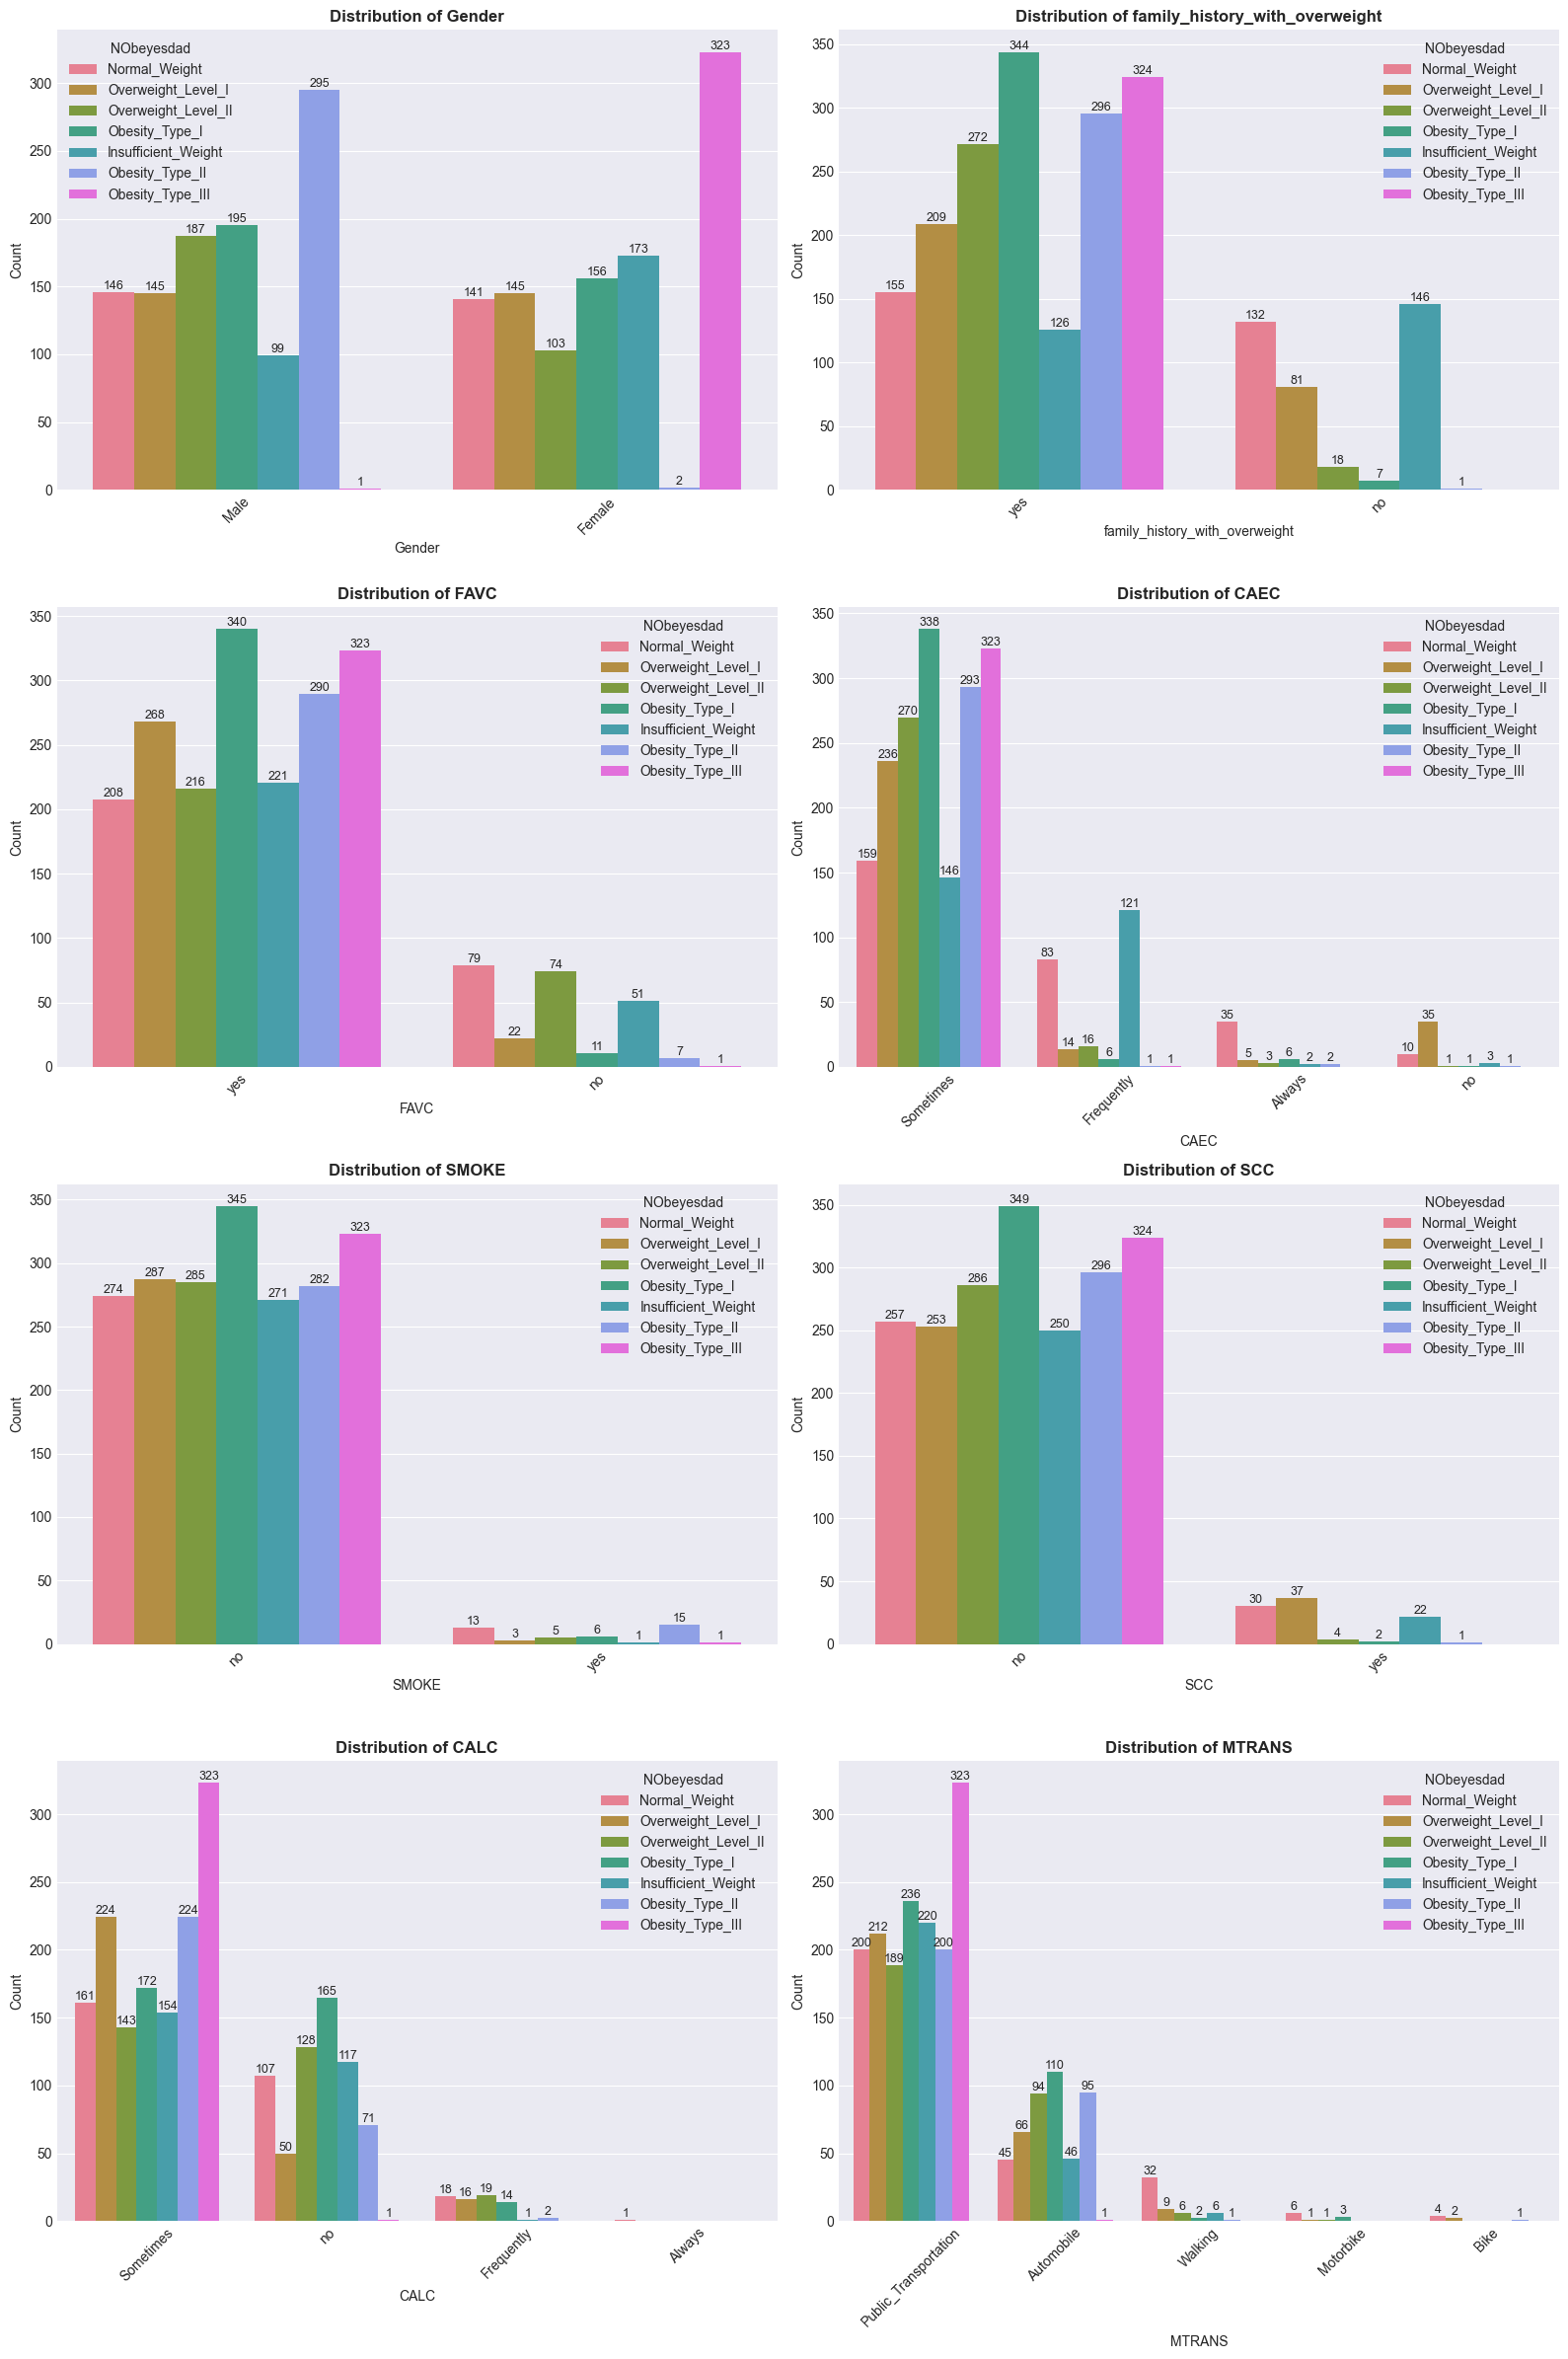

In [19]:
# Plot categorical features against target
plot_categorical_distributions(df, categorical_features, hue='NObeyesdad')

## 8. Feature Relationships & Correlations

### 8.1 Correlation Matrix (Numerical Features)

We will compute the correlation matrix for numerical features to understand linear relationships and potential multicollinearity.

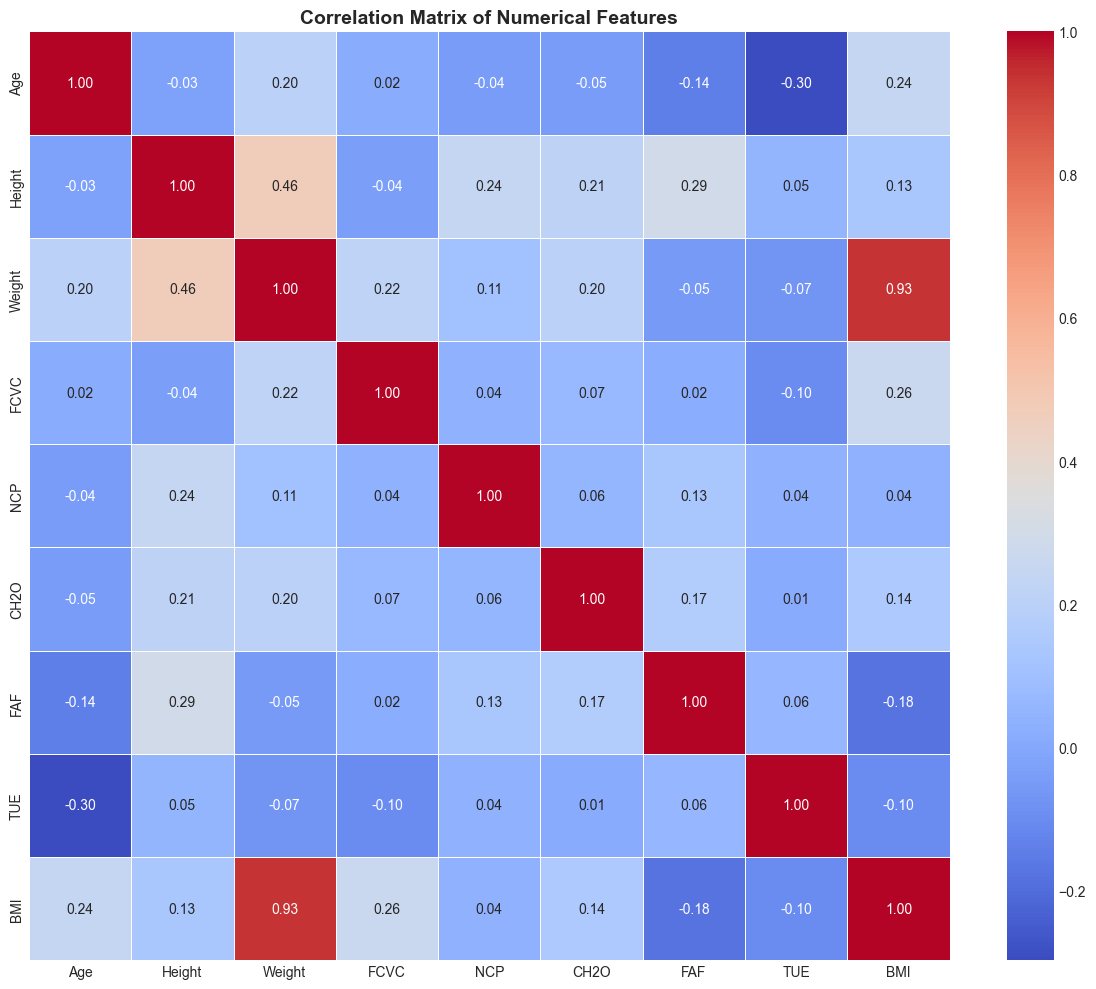

Strong Correlations (|corr| >= 0.6):
Weight               vs BMI                  :  0.93


In [20]:
# Correlation matrix for numerical features
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strong correlations
threshold = 0.6
strong_corrs = []
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) >= threshold:
            strong_corrs.append((numerical_features[i], numerical_features[j], corr))

print("Strong Correlations (|corr| >= 0.6):")
print("=" * 80)
for a, b, c in sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{a:20s} vs {b:20s} : {c:5.2f}")

### 8.2 Pairwise Relationships

Pair plots provide a visual understanding of relationships across pairs of features, colored by the target class.

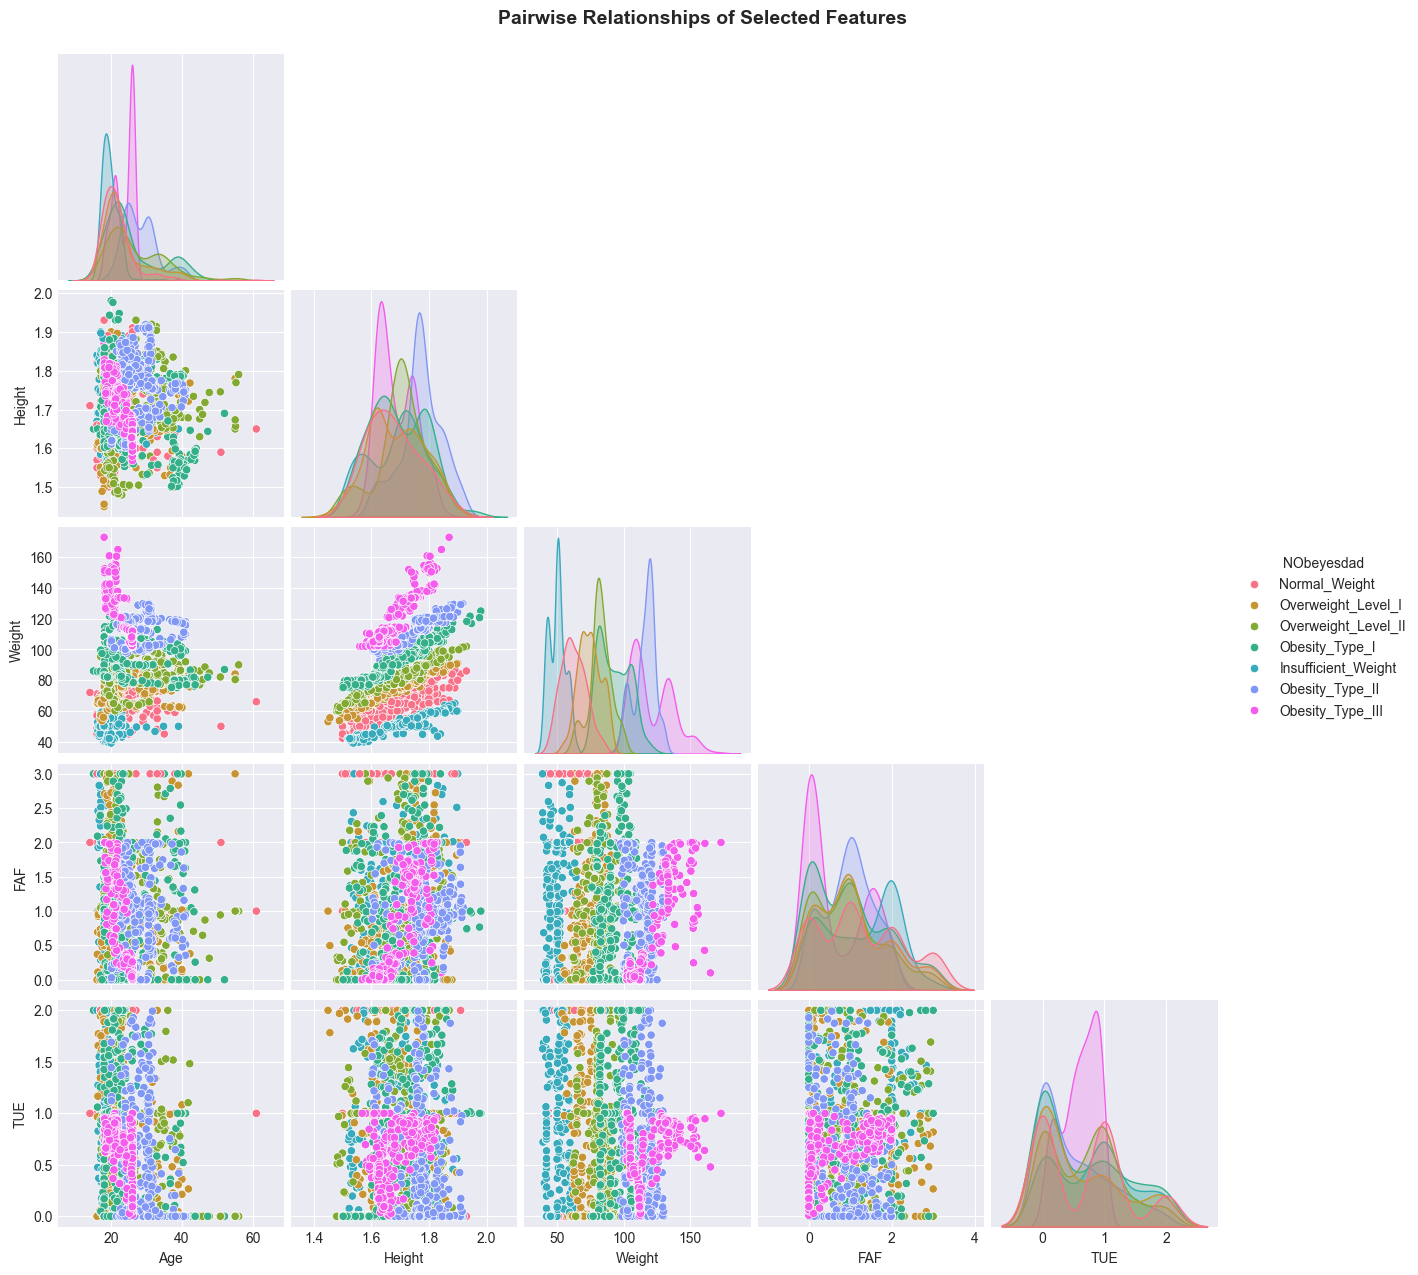

In [21]:
# Pair plot for selected numerical features (to keep it readable)
selected_numericals = ['Age', 'Height', 'Weight', 'FAF', 'TUE']

sns.pairplot(df[selected_numericals + ['NObeyesdad']], hue='NObeyesdad', corner=True)
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

## 9. Statistical Tests

We will perform basic statistical tests to assess associations between features and the target.

- ANOVA for numerical feature differences across obesity classes
- Chi-square tests for categorical feature associations with the target

In [22]:
# ANOVA: Do numerical features differ across obesity classes?
from scipy.stats import f_oneway

anova_results = {}
for col in numerical_features:
    groups = [group[col].values for name, group in df.groupby('NObeyesdad')]
    if all(len(g) > 1 for g in groups):
        stat, p = f_oneway(*groups)
        anova_results[col] = p

print("ANOVA p-values (numerical features vs target):")
print("=" * 80)
for col, p in sorted(anova_results.items(), key=lambda x: x[1]):
    print(f"{col:20s}: p = {p:.4e}")

# Chi-square: Are categorical features associated with the target?
from scipy.stats import chi2_contingency

chi2_results = {}
for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['NObeyesdad'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = p

print("\nChi-square p-values (categorical features vs target):")
print("=" * 80)
for col, p in sorted(chi2_results.items(), key=lambda x: x[1]):
    print(f"{col:30s}: p = {p:.4e}")

ANOVA p-values (numerical features vs target):
Weight              : p = 0.0000e+00
BMI                 : p = 0.0000e+00
FCVC                : p = 3.7325e-123
Age                 : p = 3.5926e-88
Height              : p = 1.6859e-44
NCP                 : p = 6.2586e-31
FAF                 : p = 7.6533e-20
CH2O                : p = 2.8373e-18
TUE                 : p = 2.0688e-08

Chi-square p-values (categorical features vs target):
CAEC                          : p = 7.3839e-159
Gender                        : p = 8.0889e-139
family_history_with_overweight: p = 4.2280e-131
CALC                          : p = 5.2872e-61
MTRANS                        : p = 5.1779e-48
FAVC                          : p = 1.4822e-47
SCC                           : p = 3.7732e-24
SMOKE                         : p = 1.5354e-05


## 10. Key Insights & Next Steps

### Key Findings

- **Target balance**: Some obesity classes may be underrepresented; consider class balancing techniques (e.g., class weights, resampling).
- **Strong predictors**: `Weight`, `Height`, `FAF` (physical activity), and `TUE` (tech usage time) show notable relationships with obesity levels.
- **Lifestyle factors**: Features such as `FAVC`, `CAEC`, and `CALC` are associated with obesity classes, indicating dietary habits’ importance.
- **Multicollinearity**: Monitor correlations among numerical features (e.g., `Height` and `Weight`). Consider derived features like BMI.

### Recommended Feature Engineering

- Create `BMI = Weight / (Height^2)` and analyze its predictive power.
- Encode categorical features using target-aware encoding strategies (e.g., one-hot encoding with regularization).
- Scale numerical features for models sensitive to feature scales (e.g., logistic regression, SVM).

### Modeling Considerations

- Start with baseline models: Logistic Regression, Decision Tree
- Try tree-based models: Random Forest, Gradient Boosting (XGBoost/LightGBM)
- Use stratified cross-validation due to multi-class target
- Evaluate with accuracy, macro F1-score, and confusion matrix

### Next Steps

1. Implement preprocessing pipeline (encoding, scaling, train/test split)
2. Train multiple models and compare performance
3. Perform hyperparameter tuning
4. Export final training logic to a script
5. Build prediction service (Flask/FastAPI) and Dockerize

In [ ]:
# BMI vs Height+Weight: multicollinearity check (correlation + VIF)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Use existing df if present; else load from notebooks/artifacts
try:
    df
except NameError:
    df = pd.read_csv('artifacts/data.csv')

cols = [c for c in df.columns]
lower = [c.lower() for c in cols]

# Try to detect height/weight/BMI columns by name patterns
height_candidates = [c for c in cols if 'height' in c.lower()]
weight_candidates = [c for c in cols if 'weight' in c.lower()]
bmi_candidates = [c for c in cols if 'bmi' in c.lower() or 'body mass index' in c.lower()]

height_col = height_candidates[0] if height_candidates else None
weight_col = weight_candidates[0] if weight_candidates else None
bmi_col = bmi_candidates[0] if bmi_candidates else None

if height_col is None or weight_col is None:
    raise ValueError('Could not find height/weight columns. Found: ' + str(cols))

# Make a clean numeric copy and handle units for height
Xh = pd.to_numeric(df[height_col], errors='coerce')
Xw = pd.to_numeric(df[weight_col], errors='coerce')

# Heuristic: convert cm to meters if values look like centimeters
h_med = np.nanmedian(Xh.values)
height_m = Xh.copy()
if h_med is not np.nan and h_med > 3.0:  # typical cm median ~160
    height_m = height_m / 100.0

# Compute BMI if not present
if bmi_col is None:
    bmi = Xw / (height_m ** 2)
    bmi_col = 'BMI_calc'
    df[bmi_col] = bmi
else:
    bmi = pd.to_numeric(df[bmi_col], errors='coerce')

# Build analysis DataFrames
A_hw = pd.DataFrame({'height_m': height_m, 'weight': Xw}).dropna()
B_bmi = pd.DataFrame({bmi_col: bmi}).dropna()
C_bmi_h = pd.DataFrame({bmi_col: bmi, 'height_m': height_m}).dropna()
D_bmi_w = pd.DataFrame({bmi_col: bmi, 'weight': Xw}).dropna()

# Correlations
def safe_corr(df_):
    if df_.shape[1] < 2:
        return None
    return df_.corr(method='pearson')

corr_hw = safe_corr(A_hw)
corr_bmi_h = safe_corr(C_bmi_h)
corr_bmi_w = safe_corr(D_bmi_w)

# VIF using sklearn: VIF_j = 1 / (1 - R^2_j)
def compute_vif(df_):
    vifs = {}
    if df_.shape[1] < 2:
        return {'info': 'Single feature; multicollinearity not applicable.'}
    for col in df_.columns:
        others = [c for c in df_.columns if c != col]
        x = df_[others].values
        y = df_[col].values
        # Drop rows with NaN in x/y
        valid = np.isfinite(y)
        for i in range(x.shape[1]):
            valid &= np.isfinite(x[:, i])
        xv = x[valid]
        yv = y[valid]
        if xv.shape[0] < 2:
            vifs[col] = np.nan
            continue
        lr = LinearRegression()
        lr.fit(xv, yv)
        r2 = lr.score(xv, yv)
        vifs[col] = np.inf if r2 >= 1.0 else 1.0 / (1.0 - r2)
    return vifs

vif_hw = compute_vif(A_hw)
vif_bmi = compute_vif(B_bmi)
vif_bmi_h = compute_vif(C_bmi_h)
vif_bmi_w = compute_vif(D_bmi_w)

print('--- Columns used ---')
print(f"height_col: {height_col} -> using meters")
print(f"weight_col: {weight_col}")
print(f"bmi_col: {bmi_col}")

print('\n--- Pearson correlations ---')
print('Height vs Weight:')
print(corr_hw)
print('\nBMI vs Height:')
print(corr_bmi_h)
print('\nBMI vs Weight:')
print(corr_bmi_w)

print('\n--- VIFs ---')
print('Set A: [height, weight] =>', vif_hw)
print('Set B: [BMI] =>', vif_bmi)
print('Set C: [BMI, height] =>', vif_bmi_h)
print('Set D: [BMI, weight] =>', vif_bmi_w)

# Simple recommendation based on VIF thresholds
# Common rule of thumb: VIF > 5 (moderate), >10 (high)
def recommendation(vif_hw, vif_bmi_h, vif_bmi_w):
    thr = 5.0
    high_hw = any([v for v in vif_hw.values() if isinstance(v, (int, float)) and v >= thr])
    high_bmi_h = any([v for v in vif_bmi_h.values() if isinstance(v, (int, float)) and v >= thr])
    high_bmi_w = any([v for v in vif_bmi_w.values() if isinstance(v, (int, float)) and v >= thr])
    if high_hw:
        msg_hw = 'Height+Weight show notable multicollinearity (VIF >= 5).'
    else:
        msg_hw = 'Height+Weight multicollinearity appears acceptable (VIF < 5).'
    if high_bmi_h:
        msg_bmi_h = 'BMI with Height is collinear; avoid using together.'
    else:
        msg_bmi_h = 'BMI with Height shows low VIF, but typically avoid redundancy.'
    if high_bmi_w:
        msg_bmi_w = 'BMI with Weight is collinear; avoid using together.'
    else:
        msg_bmi_w = 'BMI with Weight shows low VIF, but typically avoid redundancy.'
    print('\n--- Recommendation ---')
    print(msg_hw)
    print(msg_bmi_h)
    print(msg_bmi_w)
    print('Practical guidance: Prefer BMI alone OR height+weight, not BMI with either height or weight.\n'
          'If Height+Weight VIFs are high, switch to BMI to reduce multicollinearity and dimensionality.')

recommendation(vif_hw, vif_bmi_h, vif_bmi_w)

--- Columns used ---
height_col: Height -> using meters
weight_col: Weight
bmi_col: BMI

--- Pearson correlations ---
Height vs Weight:
          height_m  weight
height_m      1.00    0.46
weight        0.46    1.00

BMI vs Height:
          BMI  height_m
BMI      1.00      0.13
height_m 0.13      1.00

BMI vs Weight:
        BMI  weight
BMI    1.00    0.93
weight 0.93    1.00

--- VIFs ---
Set A: [height, weight] => {'height_m': 1.2730664726312717, 'weight': 1.2730664726312715}
Set B: [BMI] => {'info': 'Single feature; multicollinearity not applicable.'}
Set C: [BMI, height] => {'BMI': 1.0176741149012405, 'height_m': 1.0176741149012403}
Set D: [BMI, weight] => {'BMI': 7.927811638051981, 'weight': 7.927811638051981}

--- Recommendation ---
Height+Weight multicollinearity appears acceptable (VIF < 5).
BMI with Height shows low VIF, but typically avoid redundancy.
BMI with Weight is collinear; avoid using together.
Practical guidance: Prefer BMI alone OR height+weight, not BMI with eith

# Summary: BMI vs Height & Weight (Multicollinearity)

- We evaluated correlations and Variance Inflation Factors (VIF) among `Height (m)`, `Weight (kg)`, and `BMI` ($\text{BMI} = \frac{\text{Weight}}{\text{Height}^2}$).

- Correlations:
  - Height–Weight: 0.46 (moderate)
  - BMI–Height: 0.13 (weak)
  - BMI–Weight: 0.93 (strong)

- VIFs (lower is better; ~1 = no collinearity, >5 = notable):
  - [Height, Weight]: ~1.27 each → low multicollinearity
  - [BMI, Height]: ~1.02 each → low multicollinearity
  - [BMI, Weight]: ~7.93 each → high multicollinearity

- Recommendation:
  - Prefer either `BMI` alone or `Height + Weight`.
  - Avoid using `BMI` together with `Weight` due to high collinearity.
  - `BMI + Height` is statistically fine but typically redundant.

- Practical next steps:
  - Option A: Use `BMI` as a single compact feature; drop `Height` and `Weight`.
  - Option B: Keep `Height + Weight` and drop `BMI`.
  - Do not include `BMI` with `Weight` in the same model.


# Modeling Decision: Keep Height + Weight (No BMI)

- Proceed with original features `Height` and `Weight`; do not include BMI.
- Rationale: VIF for `Height` + `Weight` was ~1.27 (low multicollinearity), so both can stay without stability issues.
- Avoid adding `BMI` to the same model to prevent redundancy and potential collinearity with `Weight`.
- Downstream steps: keep preprocessing/feature selection pipelines aligned to use `Height` and `Weight` only (exclude BMI in transforms and model training).
